In [28]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.utils.io_utils import HDF5Matrix
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, Activation
from keras.applications.resnet50 import ResNet50

train_h5_path = './food41/food_c101_n10099_r64x64x3.h5'
test_h5_path = './food41/food_test_c101_n1000_r64x64x3.h5'

X_train = HDF5Matrix(train_h5_path, 'images')
y_train = HDF5Matrix(train_h5_path, 'category')
print('In Data',X_train.shape,'=>', y_train.shape)

X_test = HDF5Matrix(test_h5_path, 'images')
y_test = HDF5Matrix(test_h5_path, 'category')
print('In Data',X_test.shape,'=>', y_test.shape)

In Data (10099, 64, 64, 3) => (10099, 101)
In Data (1000, 64, 64, 3) => (1000, 101)


In [ ]:
sample_imgs = 25
with h5py.File(train_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'][(read_idxs)]
    label_names = [x.decode() for x in n_file['category_names'][()]]
fig, m_ax = plt.subplots(5, 5, figsize = (12, 12))
for c_ax, c_label, c_img in zip(m_ax.flatten(), im_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0])
    c_ax.axis('off')
    c_ax.set_title(label_names[np.argmax(c_label)])

In [37]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (64, 64, 3)))
model.add(Dropout(0.4))
model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.4))
model.add(MaxPool2D((2, 2)))

# model.add(Conv2D(32, (3, 3), padding='same',
#                  input_shape=X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(y_test.shape[1]))
model.add(Activation('softmax'))
# initiate RMSprop optimizer
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
opt = 'adam'
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

loss_history = []

In [38]:
for i in range(10):
    loss_history += [model.fit(X_train, y_train,
                               validation_data=(X_test, y_test), 
                               batch_size = 32,
                               epochs = 1, shuffle="batch")]

Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 208s 21ms/step - loss: 7.9131 - accuracy: 0.0083 - val_loss: 4.6149 - val_accuracy: 0.0140
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 187s 19ms/step - loss: 4.6162 - accuracy: 0.0106 - val_loss: 4.6169 - val_accuracy: 0.0140
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 186s 18ms/step - loss: 4.6161 - accuracy: 0.0093 - val_loss: 4.6182 - val_accuracy: 0.0100
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
10099/10099 [==============================] - 201s 20ms/step - loss: 4.6147 - accuracy: 0.0119 - val_loss: 4.6204 - val_accuracy: 0.0100
Train on 10099 samples, validate on 1000 samples
Epoch 1/1
 6176/10099 [=================>............] - ETA: 1:13 - loss: 4.6148 - accuracy: 0.0128

KeyboardInterrupt: 

In [ ]:
epich = np.cumsum(np.concatenate(
    [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
_ = ax1.plot(epich,
             np.concatenate([mh.history['loss'] for mh in loss_history]),
             'b-',
             epich, np.concatenate(
        [mh.history['val_loss'] for mh in loss_history]), 'r-')
ax1.legend(['Training', 'Validation'])
ax1.set_title('Loss')

_ = ax2.plot(epich, np.concatenate(
    [mh.history['accuracy'] for mh in loss_history]), 'b-',
                 epich, np.concatenate(
        [mh.history['val_accuracy'] for mh in loss_history]),
                 'r-')
ax2.legend(['Training', 'Validation'])
ax2.set_title('Accuracy')

bibimbap
steak
deviled_eggs
escargots
eggs_benedict
cannoli
greek_salad
bibimbap
sashimi
ceviche
bibimbap
deviled_eggs
onion_rings
deviled_eggs
spaghetti_bolognese
pork_chop


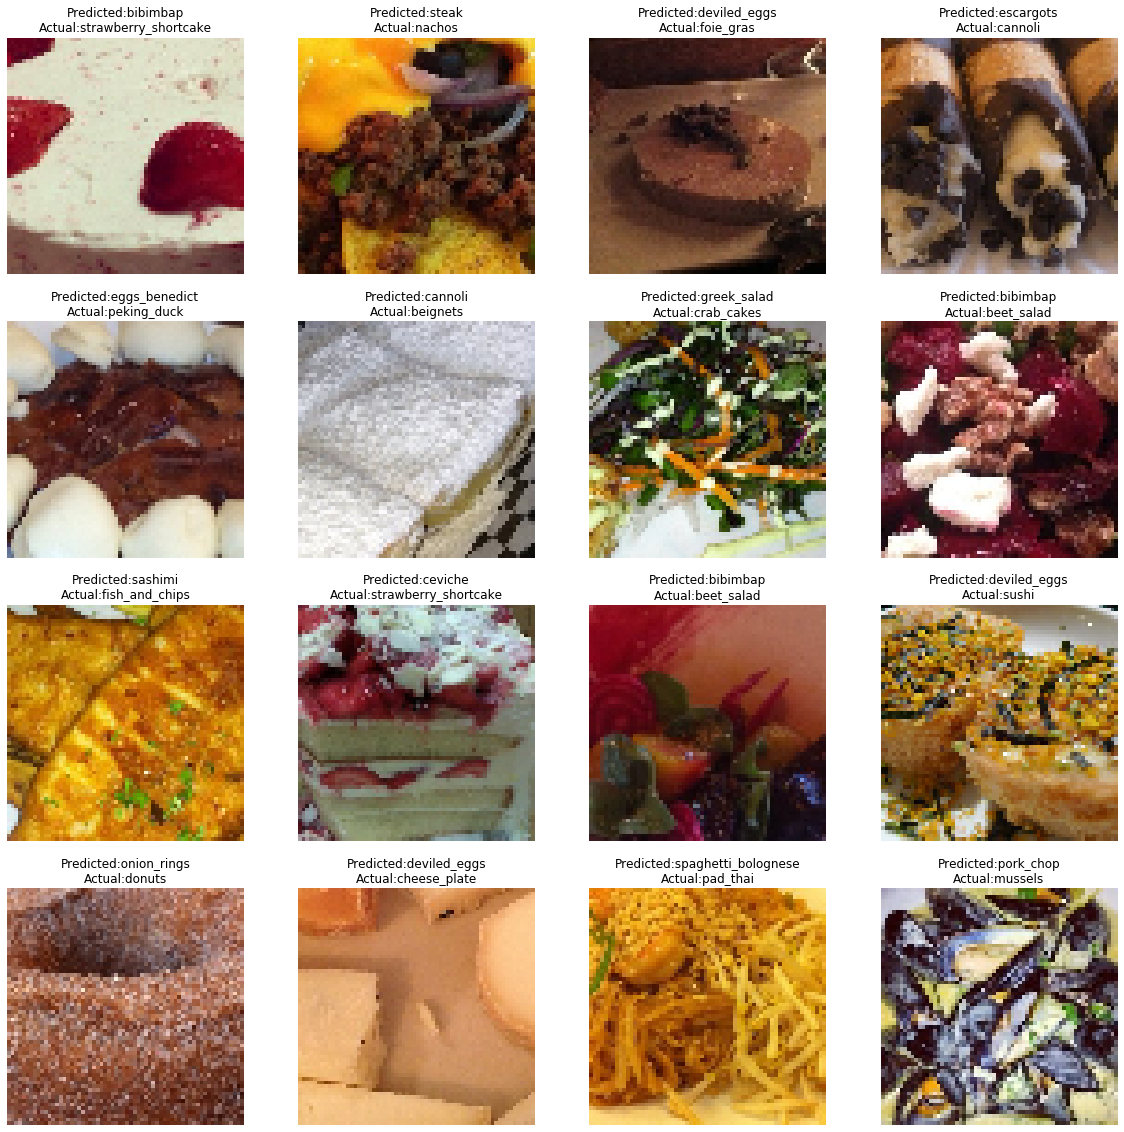

In [32]:
sample_imgs = 16
with h5py.File(test_h5_path, 'r') as n_file:
    total_imgs = n_file['images'].shape[0]
    read_idxs = slice(0,sample_imgs)
    im_data = n_file['images'][read_idxs]
    im_label = n_file['category'][(read_idxs)]
    label_names = [x.decode() for x in n_file['category_names'][()]]
pred_label = model.predict(im_data)
fig, m_ax = plt.subplots(4, 4, figsize = (20, 20))
for c_ax, c_label, c_pred, c_img in zip(m_ax.flatten(), im_label, pred_label, im_data):
    c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0])
    c_ax.axis('off')
    c_ax.set_title('Predicted:{}\nActual:{}'.format(label_names[np.argmax(c_pred)],
                                                  label_names[np.argmax(c_label)]))
#     print(label_names[np.argmax(c_pred)])

In [33]:
model.save('my_model.h5')